In [1]:
import torch
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.tensorboard import TensorBoardCallback
from fastai.callback.tracker import SaveModelCallback

from pathlib import Path
import pandas as pd
import json

2026-01-11 00:29:48.535030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-11 00:29:48.535068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-11 00:29:48.536307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-11 00:29:48.543070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

A module that was compiled using NumPy 1.x cannot be

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/m_zsuetam/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/m_zsuetam/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

In [2]:
!hostname

AORUS-X470


In [3]:
ROOT_DIR = Path('.').resolve().parent

DATASETS_DIR = ROOT_DIR / "datasets"
POTSDAM_DIR = DATASETS_DIR / "Potsdam-tiles-512"
assert POTSDAM_DIR.exists(), f"Potsdam dataset not found in {POTSDAM_DIR}"

EXPERIMENTS_DIR = ROOT_DIR / 'experiments'
LOGS_DIR = EXPERIMENTS_DIR / 'logs'
LOGS_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
postdam_static = DATASETS_DIR/'Potsdam-static'
df_classes = pd.read_csv(postdam_static/'classes.csv')
df_classes

,class_id,name,color_name,color
0,0,Impervious surfaces,white,"(255, 255, 255)"
1,1,Buildings,blue,"(0, 0, 255)"
2,2,Low vegetation,cyan,"(0, 255, 255)"
3,3,Trees,green,"(0, 255, 0)"
4,4,Cars,yellow,"(255, 255, 0)"
5,5,Clutter,red,"(255, 0, 0)"
6,6,Undefined,black,"(0, 0, 0)"


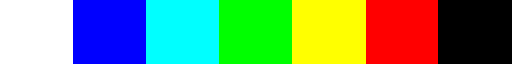

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

def hex2rgb(hex_color):
    if isinstance(hex_color, tuple) or isinstance(hex_color, list):
        return tuple(hex_color)
    if hex_color.startswith('#'):
        hex_color = hex_color.lstrip('#')
        t = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    else:
        t = tuple(int(x.strip()) for x in hex_color.strip('()').split(','))
    return t

ssd_cmap = ListedColormap(
    df_classes['color'].apply(lambda x: np.array(hex2rgb(x))/255.0).to_list(),
    name='skyscapes',
    N = len(df_classes)
) 

potsdam_plot_kwargs = {
    'vmin': 0,
    'vmax': 10,  # Align with tab10's range
    'cmap': ssd_cmap
}

potsdam_legend_kwargs = {
    'handles': [
        Patch(color=potsdam_plot_kwargs['cmap'](i), label=name) 
        for i, name in enumerate(df_classes.name.values)
    ],
    'bbox_to_anchor': (1.05, 1),
    'loc': 'upper left',
    'borderaxespad': 0.,
}

potsdam_plot_kwargs['cmap']

In [6]:
image_paths = L(sorted([f for f in get_image_files(POTSDAM_DIR) if f.parent != 'labels']))
image_paths

(#6624) [Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y0.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y1024.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y1536.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y2048.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y2560.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x0_y3072.png'),Path('/home/m_zsuetam/Documents/Uni/computational-intelligence/proj/datasets/Potsdam-tiles-512/train/images/top_potsdam_2_10_RGB_x

In [7]:
import albumentations as A

class AlbumentationsTransform(Transform):
    split_idx = 0
    
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

# heavy lighting augmentation
a_tfms = A.Compose([
    A.RandomGamma(p=0.5),
    A.CLAHE(p=0.5), # Great for seeing details in shadows
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.3),
    # A.GridDistortion(p=0.3), # Helps with road undulations
])

In [ ]:
# IMG_SIZE = 300
IMG_SIZE = 512

DB_MEAN = [0.3362390100955963, 0.35974231362342834, 0.3330190181732178]
DB_STD = [0.11687745898962021, 0.11572890728712082, 0.12002932280302048]
    
def get_y(img_path):
    img_path = Path(img_path)
    label_dir = img_path.parent.parent / "labels"
    label_name = img_path.name.replace("_RGB", "_label")
    return label_dir / label_name

db = DataBlock(
    blocks=(
        ImageBlock, 
        MaskBlock(codes=df_classes.name)
    ),
    get_y = get_y,
    splitter=GrandparentSplitter(valid_name='val'),
    item_tfms = [
        Resize((IMG_SIZE), method='nearest'),
        # AlbumentationsTransform(a_tfms)
    ],
    batch_tfms=[
        Dihedral(), 
        *aug_transforms(
            max_rotate=10.0,    # Still useful for small "tilts" (non-90 degree)
            min_zoom=0.9,
            max_zoom=1.1,       # Keep conservative to preserve context
            
            max_lighting=0.4,    
            p_lighting=0.8,
            
            # Warp helps simulate slightly off-nadir camera angles
            # max_warp=0.2,       
            # p_affine=0.75,
        ),
        Normalize.from_stats(
            mean=tensor(DB_MEAN),
            std=tensor(DB_STD)
        )
    ],
)

In [9]:
desired_bs = 16
dls_bs = 4

dls = db.dataloaders(
    source=image_paths, 
    bs=dls_bs,
    num_workers=8 # Use 4 or 8 to keep the GPU fed
)

gradient_accum = GradientAccumulation(n_acc=desired_bs//dls_bs)
print(f"Using gradient accumulation with {desired_bs//dls_bs} steps")

Using gradient accumulation with 4 steps


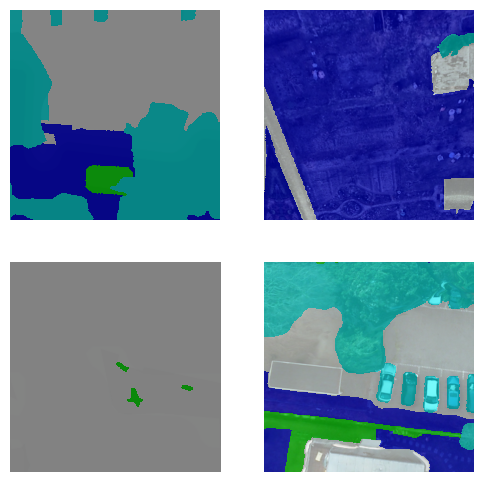

In [10]:
dls.show_batch(max_n=4, **potsdam_plot_kwargs)

In [11]:
loss_func = CrossEntropyLossFlat(axis=1)

In [25]:
pixel_accuracy = partial(accuracy, axis=1)

metrics = [
    pixel_accuracy,
    
    DiceMulti(), # F1 Score

    JaccardCoeffMulti(), # IoU
]

In [13]:
# resnet50       (best cost/perf)
# efficientnet_b3
# swin_t         (amazing on aerial)
# convnext_tiny  (excellent)

# arch = resnet50
model = resnet34

In [27]:
learn = unet_learner(
    dls, 
    model,
    loss_func=loss_func,
    metrics=metrics,
    pretrained=False,
).to_fp16()

learn.summary()

/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/fastai/metrics.py:375: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)
/home/m_zsuetam/anaconda3/envs/dl/lib/python3.11/site-packages/fastai/metrics.py:392: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_jaccard_scores)


DynamicUnet (Input shape: 4 x 3 x 512 x 512)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 256 x 256  
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 128 x 128  
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

resnet50: Total params: 339,071,460

resnet34: Total params: 41,221,668

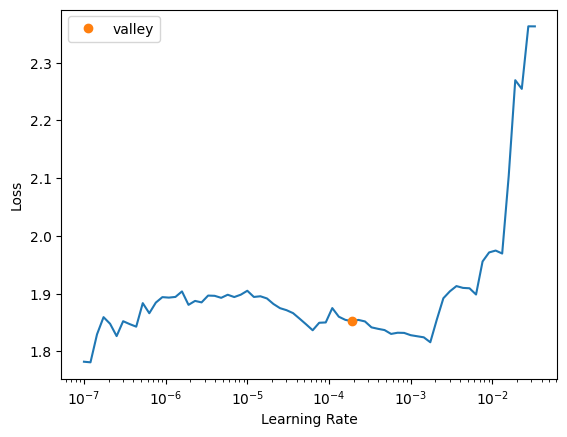

In [15]:
suggested_lr = None
suggested_lr = learn.lr_find()

In [16]:
lr = suggested_lr.valley if suggested_lr is not None else 2.5e-3
print(f"Using learning rate: {lr} {'(hardcoded)' if suggested_lr is None else '(suggested)'}")

Using learning rate: 0.00019054606673307717 (suggested)


In [17]:
from fastai.callback.tracker import SaveModelCallback
from fastai.callback.tracker import EarlyStoppingCallback

SaveCB = lambda fname: SaveModelCallback(
    monitor='jaccard_coeff_multi', 
    fname=fname, 
    comp=np.greater,
    with_opt=False
)

LogCB = lambda fname: CSVLogger(
    fname=LOGS_DIR/fname
)

ValidLossEarlyStoppingCB = lambda patience: EarlyStoppingCallback(
    monitor='valid_loss',
    min_delta=0.001,
    patience=patience
)

In [ ]:
learn.fit_one_cycle(
    100, 
    lr,
    cbs=[
        SaveCB('best_segmentation'),
        LogCB('segmentation_log.csv'),
        ValidLossEarlyStoppingCB(10),
        gradient_accum,
    ]
)

epoch,train_loss,valid_loss,accuracy,dice_multi,jaccard_coeff_multi,time
0,1.414531,1.311618,0.389466,0.221574,0.139250,06:40
1,1.381749,1.236943,0.469051,0.272391,0.177675,06:41
2,1.383587,1.244656,0.471842,0.309019,0.199686,06:40
3,1.345710,1.317088,0.449758,0.294688,0.190170,06:41
4,1.370083,1.260378,0.417288,0.335606,0.211852,06:40


Better model found at epoch 0 with jaccard_coeff_multi value: 0.13925017870817855.
Better model found at epoch 1 with jaccard_coeff_multi value: 0.17767453132117725.
Better model found at epoch 2 with jaccard_coeff_multi value: 0.19968631085359126.
Better model found at epoch 4 with jaccard_coeff_multi value: 0.21185229695573682.


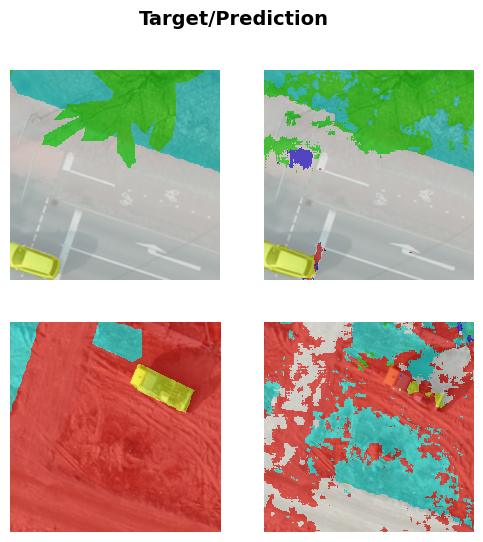

In [94]:
learn.show_results(max_n=4, cmap=ssd_cmap)

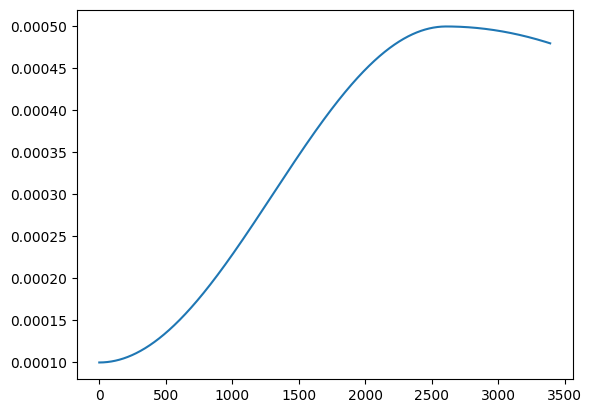

In [260]:
plt.plot(
    np.arange(len(learn.recorder.hps['lr'])),
    learn.recorder.hps['lr']
)

In [95]:
learn.export('../experiments/baseline-34/baseline-54-iou.pkl')

Reference approaches:
- [InceptionResNetV2-UNet (81% Dice Coeff. & 86% Acc)](https://www.kaggle.com/code/ayushdabra/inceptionresnetv2-unet-81-dice-coeff-86-acc)
- [Aerial Image for Semantic Segmentation (~85% Dice Coeff.)](https://www.kaggle.com/code/aletbm/aerial-image-for-semantic-segmentation#Evaluation-metrics)
- [Unet segmentation implementation with ASPP](https://www.kaggle.com/discussions/general/205141)

? Edge-Refinement Network (ERN) are extremely effective for your aerial imagery task.

# CSE-UNet

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class ConvBlock(nn.Module):
    """
    Standard Conv -> BN -> ReLU block used throughout the network.
    """
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, dilation=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.bn(self.conv(x)))

class DoubleConv(nn.Module):
    """
    The standard U-Net encoder block: Two Conv3x3 blocks.
    """
    def __init__(self, in_channels, out_channels, dropout_rate=0.2):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            ConvBlock(in_channels, out_channels),
            ConvBlock(out_channels, out_channels),
            nn.Dropout2d(dropout_rate)
        )

    def forward(self, x):
        return self.double_conv(x)

class RFB_Skip(nn.Module):
    """
    Multi-level RFB-based skip pathways (Section 2.2).
    It consists of two parallel paths:
    1. A stack of standard 3x3 convolutions (approximating a larger kernel).
    2. A single dilated convolution.
    The outputs are concatenated.
    """
    def __init__(self, in_channels, num_stack, dilation_rate):
        super(RFB_Skip, self).__init__()
        
        # Path 1: Stack of standard convolutions (Green blocks in diagram)
        # To emulate large kernels like 7x7, we stack 3x3 convs.
        stack_layers = []
        for _ in range(num_stack):
            # 1x1 convs are used in the bottom level as per text, 3x3 elsewhere
            k = 3 if num_stack > 1 else 1 
            p = 1 if num_stack > 1 else 0
            stack_layers.append(ConvBlock(in_channels, in_channels, kernel_size=k, padding=p))
        self.stack_path = nn.Sequential(*stack_layers)

        # Path 2: Dilated Convolution (Yellow blocks in diagram)
        # Note: Section 2.2 mentions matching receptive fields.
        # For the bottom level (dilation 1), it acts as a standard conv.
        self.dilated_path = ConvBlock(in_channels, in_channels, 
                                      kernel_size=3, 
                                      padding=dilation_rate, # Padding must equal dilation to keep size
                                      dilation=dilation_rate)

    def forward(self, x):
        out_stack = self.stack_path(x)
        out_dilated = self.dilated_path(x)
        # Concatenate features from both paths
        return torch.cat([out_stack, out_dilated], dim=1)

class CSE_UNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=1):
        super(CSE_UNet, self).__init__()
        
        filters = [64, 128, 256, 512, 1024]

        # --- ENCODER (Dual-Path) ---
        
        # Level 1
        self.enc1_main = DoubleConv(in_channels, filters[0])
        self.pool1 = nn.MaxPool2d(2)
        # Aux Path 1: Conv7x7 stride 2 (Section 2.3)
        self.enc1_aux = nn.Sequential(
            nn.Conv2d(in_channels, filters[0], kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(filters[0])
        )

        # Level 2
        self.enc2_main = DoubleConv(filters[0], filters[1])
        self.pool2 = nn.MaxPool2d(2)
        # Aux Path 2: Conv5x5 stride 2
        self.enc2_aux = nn.Sequential(
            nn.Conv2d(filters[0], filters[1], kernel_size=5, stride=2, padding=2, bias=False),
            nn.BatchNorm2d(filters[1])
        )

        # Level 3
        self.enc3_main = DoubleConv(filters[1], filters[2])
        self.pool3 = nn.MaxPool2d(2)
        # Aux Path 3: Conv3x3 stride 2
        self.enc3_aux = nn.Sequential(
            nn.Conv2d(filters[1], filters[2], kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(filters[2])
        )

        # Level 4
        self.enc4_main = DoubleConv(filters[2], filters[3])
        self.pool4 = nn.MaxPool2d(2)
        # Aux Path 4: Conv2x2 stride 2
        # Note: 2x2 kernel with stride 2 and padding 0 halves the dimension perfectly
        self.enc4_aux = nn.Sequential(
            nn.Conv2d(filters[2], filters[3], kernel_size=2, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(filters[3])
        )

        # Bridge
        self.bridge = DoubleConv(filters[3], filters[4])

        # --- RFB SKIP PATHWAYS ---
        
        # According to Section 2.2 and Diagram
        # Top (Level 1): Stack of 3, Dilation 7
        self.rfb1 = RFB_Skip(filters[0], num_stack=3, dilation_rate=7)
        # Level 2: Stack of 2, Dilation 5
        self.rfb2 = RFB_Skip(filters[1], num_stack=2, dilation_rate=5)
        # Level 3: Stack of 1 (3x3), Dilation 3
        self.rfb3 = RFB_Skip(filters[2], num_stack=1, dilation_rate=3)
        # Level 4: Stack of 1 (1x1), Dilation 1
        # Text says: "one convolution layer with 1x1... and one dilated... dilation rate of 1"
        # We pass num_stack=1, but internal logic handles the 1x1 kernel switch for the bottom layer
        self.rfb4 = RFB_Skip(filters[3], num_stack=1, dilation_rate=1) 
        
        # Note on RFB4: The stack logic in `RFB_Skip` uses 3x3 by default. 
        # We need to manually override or create a specific block if strict adherence to "1x1" 
        # for the stack path is required. I added logic in RFB_Skip to handle this.

        # --- DECODER ---
        
        # Since RFB concatenates output, skip channels are doubled
        
        # Decoder 4
        self.up4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.up_conv4 = nn.Conv2d(filters[4], filters[3], kernel_size=1) # Conv1x1 after upsample
        self.dec4 = DoubleConv(filters[3] + (filters[3] * 2), filters[3]) # Input = Prev + Skip(RFB x2)

        # Decoder 3
        self.up3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.up_conv3 = nn.Conv2d(filters[3], filters[2], kernel_size=1)
        self.dec3 = DoubleConv(filters[2] + (filters[2] * 2), filters[2])

        # Decoder 2
        self.up2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.up_conv2 = nn.Conv2d(filters[2], filters[1], kernel_size=1)
        self.dec2 = DoubleConv(filters[1] + (filters[1] * 2), filters[1])

        # Decoder 1
        self.up1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.up_conv1 = nn.Conv2d(filters[1], filters[0], kernel_size=1)
        self.dec1 = DoubleConv(filters[0] + (filters[0] * 2), filters[0])

        # Final Output
        self.final_conv = nn.Conv2d(filters[0], num_classes, kernel_size=1)

    def forward(self, x):
        # --- ENCODER + DUAL PATH FUSION ---
        
        # Stage 1
        x1_main = self.enc1_main(x)
        x1_pool = self.pool1(x1_main)
        x1_aux = self.enc1_aux(x)
        # Fusion: Main (Pooled) + Aux
        x1_fused = x1_pool + x1_aux 
        # Apply ReLU after addition (Standard ResNet practice, though not explicitly drawn, implied by block logic)
        x1_fused = F.relu(x1_fused)

        # Stage 2
        x2_main = self.enc2_main(x1_fused)
        x2_pool = self.pool2(x2_main)
        x2_aux = self.enc2_aux(x1_fused)
        x2_fused = x2_pool + x2_aux
        x2_fused = F.relu(x2_fused)

        # Stage 3
        x3_main = self.enc3_main(x2_fused)
        x3_pool = self.pool3(x3_main)
        x3_aux = self.enc3_aux(x2_fused)
        x3_fused = x3_pool + x3_aux
        x3_fused = F.relu(x3_fused)

        # Stage 4
        x4_main = self.enc4_main(x3_fused)
        x4_pool = self.pool4(x4_main)
        x4_aux = self.enc4_aux(x3_fused)
        x4_fused = x4_pool + x4_aux
        x4_fused = F.relu(x4_fused)

        # Bridge
        x_bridge = self.bridge(x4_fused)

        # --- RFB SKIP GENERATION ---
        # The skips come from the fused encoder features before they went to the next level
        # Note: The diagram arrows for skips originate from the output of the "Main" double conv 
        # BEFORE pooling/fusion? Or from the fused result?
        # Looking at Fig 2: The arrows go Inputs -> Conv -> [Conv] -> right arrow to RFB.
        # This implies the skip comes from the STANDARD encoder path before pooling.
        
        s1 = self.rfb1(x1_main)
        s2 = self.rfb2(x2_main)
        s3 = self.rfb3(x3_main)
        s4 = self.rfb4(x4_main)

        # --- DECODER ---
        
        # Block 4
        d4 = self.up4(x_bridge)
        d4 = self.up_conv4(d4)
        # Concatenate with RFB Skip 4
        d4 = torch.cat([d4, s4], dim=1)
        d4 = self.dec4(d4)

        # Block 3
        d3 = self.up3(d4)
        d3 = self.up_conv3(d3)
        d3 = torch.cat([d3, s3], dim=1)
        d3 = self.dec3(d3)

        # Block 2
        d2 = self.up2(d3)
        d2 = self.up_conv2(d2)
        d2 = torch.cat([d2, s2], dim=1)
        d2 = self.dec2(d2)

        # Block 1
        d1 = self.up1(d2)
        d1 = self.up_conv1(d1)
        d1 = torch.cat([d1, s1], dim=1)
        d1 = self.dec1(d1)

        return self.final_conv(d1)

In [21]:
arch_cse = CSE_UNet(in_channels=3, num_classes=len(df_classes)).to('cuda')
arch_cse.smooth_loss = torch.tensor(0.0)

In [22]:
class CombinedLoss:
    def __init__(self, dice_weight=0.3):
        self.dice_weight = dice_weight
        self.ce_weight = 1.0 - dice_weight
        self.dice = DiceLoss(axis=1, reduction='mean')
        self.ce = CrossEntropyLossFlat(axis=1, reduction='mean')

    def __call__(self, pred, targ):
        return (
            self.dice(pred, targ) * self.dice_weight +
            self.ce(pred, targ) * self.ce_weight
        )

loss_func = CombinedLoss(dice_weight=0.4)

In [69]:
learn_cse: Learner = Learner(
    dls, 
    arch_cse,
    metrics = metrics,
    # loss_func = CrossEntropyLossFlat(axis=1),
    loss_func = CombinedLoss(dice_weight=0.4),
    # default_cbs=False # unet_learner does not support...
    cbs = [
        EarlyStoppingCallback(
            patience=10, 
            min_delta=0.0005
        ),
        TensorBoardCallback(
            log_dir=EXPERIMENTS_DIR/'tb-log',
            log_preds=False # to surpress the error
        ),
        SaveModelCallback(
            monitor='valid_jaccard_coeff_multi', 
            fname='cse-unet-best',
            with_opt=True,
            at_end=True # to surpress the error
        )
    ]
)
learn_cse._grab_cbs(Recorder)[0].train_metrics = True # ... so we enable train_metrics manually

# learn_cse.summary()

Total params: 36,988,807

In [27]:
REFIND_LR = False
if REFIND_LR:
    learn_cse.lr_find(start_lr=1e-6, end_lr=10)

In [28]:
lr = 1e-3

In [ ]:
learn_cse.fine_tune(
    freeze_epochs=0,
    epochs=100,
    base_lr=lr,
)

epoch,train_loss,train_dice_multi,train_jaccard_coeff_multi,valid_loss,valid_dice_multi,valid_jaccard_coeff_multi,time
0,1.048673,0.279322,0.185267,1.034733,0.380928,0.253818,02:29
1,1.024313,0.393363,0.266301,0.924578,0.495341,0.348455,02:29
2,0.979703,0.441189,0.303958,0.909753,0.514642,0.364453,02:28
3,0.964600,0.470138,0.326601,0.935636,0.481667,0.331095,02:28
4,0.938509,0.486926,0.341067,0.840874,0.593463,0.443014,02:29
5,0.908116,0.495058,0.349941,0.854622,0.582793,0.429051,02:29
6,0.845688,0.526628,0.376158,0.822566,0.597104,0.437964,02:29
7,0.906432,0.524955,0.375741,0.858584,0.528025,0.372442,02:29
8,0.890895,0.537954,0.385865,0.812567,0.600765,0.449156,02:29
9,0.894244,0.544497,0.392528,0.840645,0.626386,0.465519,02:29


Better model found at epoch 0 with valid_jaccard_coeff_multi value: 0.25381785997241163.
Better model found at epoch 1 with valid_jaccard_coeff_multi value: 0.3484552890238326.
Better model found at epoch 2 with valid_jaccard_coeff_multi value: 0.3644528750927354.
Better model found at epoch 4 with valid_jaccard_coeff_multi value: 0.44301435126482347.
Better model found at epoch 8 with valid_jaccard_coeff_multi value: 0.44915626514842094.
Better model found at epoch 9 with valid_jaccard_coeff_multi value: 0.4655192512664547.
Better model found at epoch 13 with valid_jaccard_coeff_multi value: 0.47984364081117753.
Better model found at epoch 14 with valid_jaccard_coeff_multi value: 0.4805803388214345.
Better model found at epoch 20 with valid_jaccard_coeff_multi value: 0.5034582711437514.
Better model found at epoch 27 with valid_jaccard_coeff_multi value: 0.5464438176999654.
Better model found at epoch 35 with valid_jaccard_coeff_multi value: 0.5536499275147136.
Better model found at e

In [32]:
full_history = []
full_history.append(hist_to_df(learn_cse))

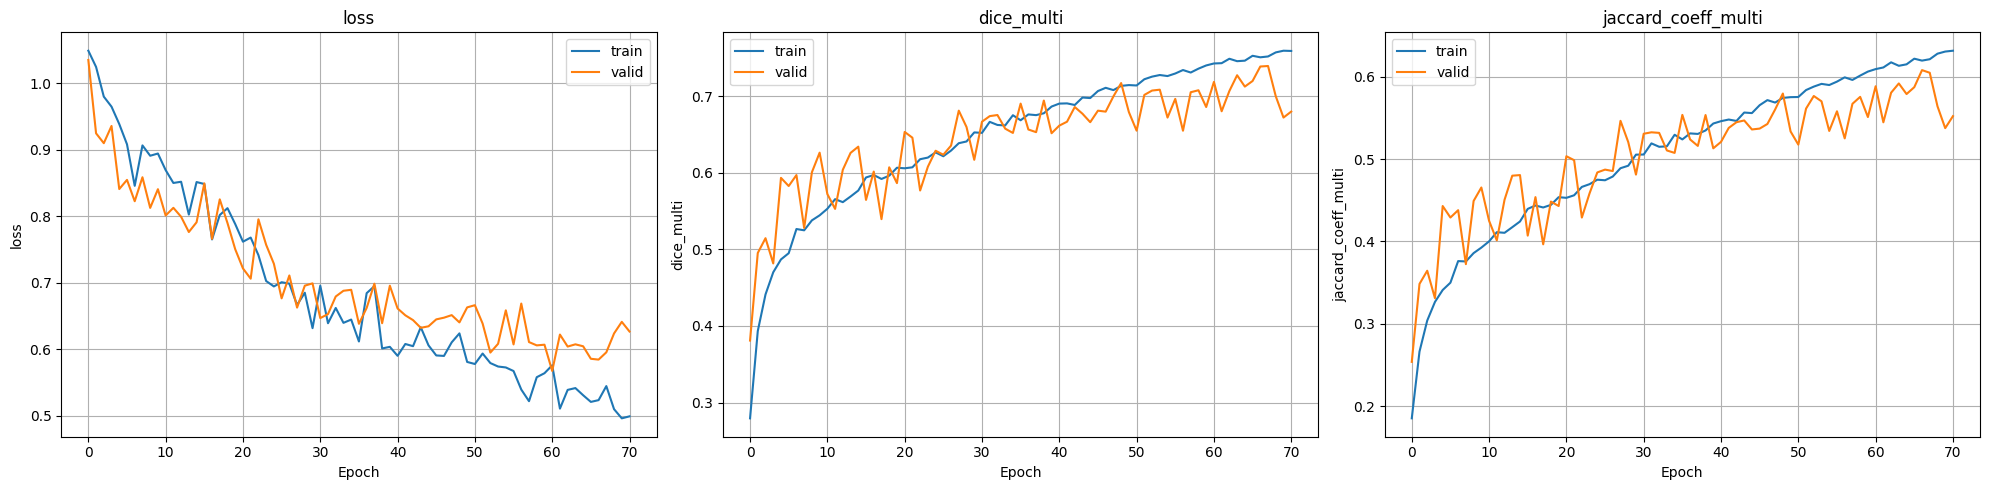

In [33]:
plot_hist(full_history)

**Second Phase**

If the training stops before Epoch 100, we resume the training with a much lower LR to try and eliminate the bounce.

In [34]:
learn_cse.load('cse-unet-best')

In [35]:
learn_cse.unfreeze() # just to be sure
learn_cse.fit_one_cycle(
    20,
    1e-4
)

epoch,train_loss,train_dice_multi,train_jaccard_coeff_multi,valid_loss,valid_dice_multi,valid_jaccard_coeff_multi,time
0,0.480652,0.773255,0.647942,0.572884,0.710579,0.582992,02:29
1,0.474380,0.776518,0.652065,0.591813,0.699227,0.566458,02:29
2,0.489027,0.775385,0.650288,0.577381,0.707072,0.578893,02:29
3,0.485362,0.776833,0.651572,0.600754,0.690864,0.562625,02:29
4,0.500333,0.771826,0.646513,0.575453,0.726574,0.594163,02:29
5,0.512179,0.774562,0.649937,0.571314,0.717852,0.590094,02:29
6,0.474419,0.775436,0.650175,0.559737,0.735621,0.606060,02:29
7,0.490022,0.776493,0.652088,0.595564,0.688385,0.564546,02:29
8,0.498484,0.778140,0.653800,0.573005,0.713225,0.588468,02:29
9,0.491281,0.779027,0.655370,0.589958,0.717770,0.588057,02:29


Better model found at epoch 0 with valid_jaccard_coeff_multi value: 0.5829922371263142.
Better model found at epoch 4 with valid_jaccard_coeff_multi value: 0.5941627962177743.
Better model found at epoch 6 with valid_jaccard_coeff_multi value: 0.6060601202035155.
Better model found at epoch 11 with valid_jaccard_coeff_multi value: 0.6201197259019058.


In [36]:
full_history.append(hist_to_df(learn_cse))

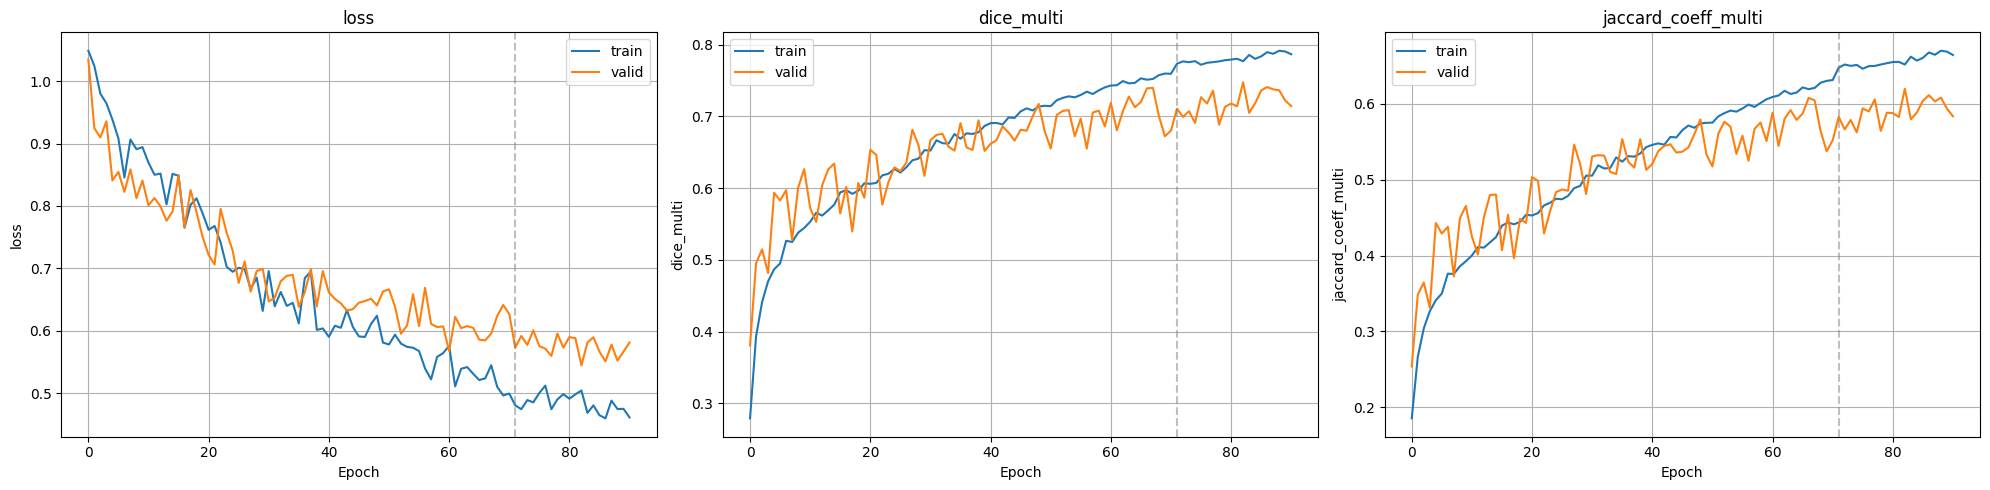

In [37]:
plot_hist(full_history)

In [ ]:
save_full_history(full_history, "full_history.md")

TypeError: Invalid shape (7, 256, 256) for image data

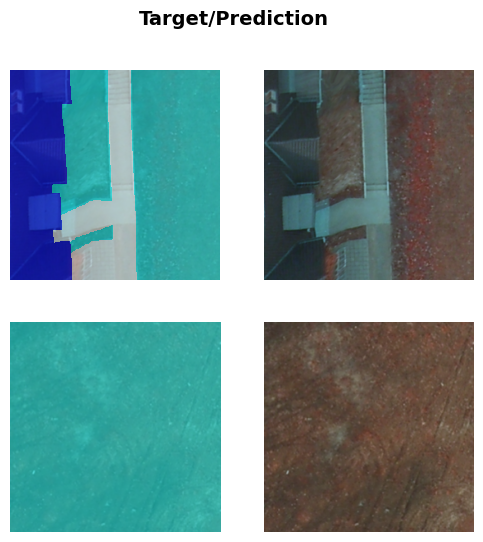

In [46]:
learn_cse.show_results(max_n=4, cmap=ssd_cmap)

In [47]:
learn_cse.export('../experiments/cse-updated/cse-62-iou.pkl')

**Notes**:
- the cse-unet needed 256x256 input size to work properly
- cse-unet is 10x smaller